In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df1=pd.read_excel('X_bp.xlsx')
df2=pd.read_excel('X_nup.xlsx')

In [3]:
df1.shape

(1023, 11)

In [4]:
df1.head(3)

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0


In [5]:
df2.shape

(1040, 4)

In [6]:
df2.head(3)

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0


In [7]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AORUS SID\

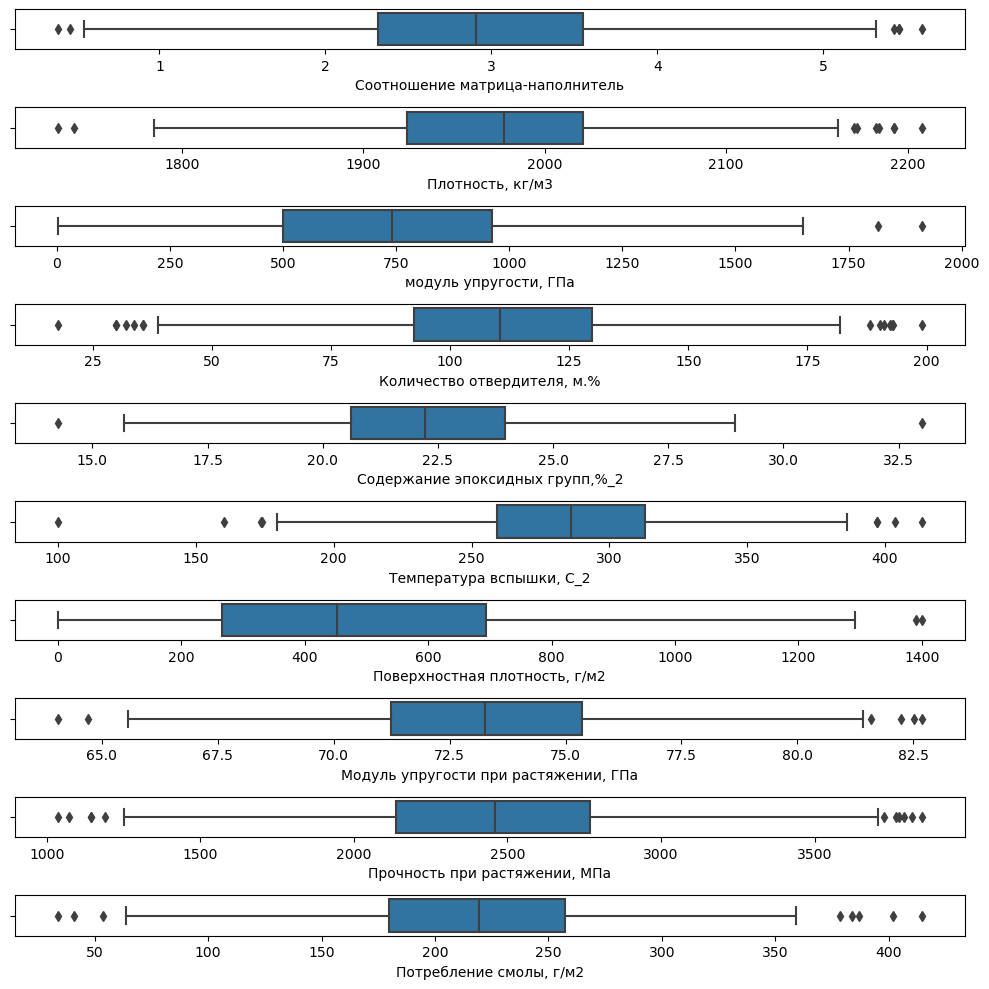

In [8]:
fig, axs = plt.subplots(10, figsize = (10,10))
plt1 = sns.boxplot(df1['Соотношение матрица-наполнитель'], ax = axs[0])
plt2 = sns.boxplot(df1['Плотность, кг/м3'], ax = axs[1])
plt3 = sns.boxplot(df1['модуль упругости, ГПа'], ax = axs[2])
plt4 = sns.boxplot(df1['Количество отвердителя, м.%'], ax = axs[3])
plt5 = sns.boxplot(df1['Содержание эпоксидных групп,%_2'], ax = axs[4])
plt6 = sns.boxplot(df1['Температура вспышки, С_2'], ax = axs[5])
plt7 = sns.boxplot(df1['Поверхностная плотность, г/м2'], ax = axs[6])
plt8 = sns.boxplot(df1['Модуль упругости при растяжении, ГПа'], ax = axs[7])
plt9 = sns.boxplot(df1['Прочность при растяжении, МПа'], ax = axs[8])
plt10 = sns.boxplot(df1['Потребление смолы, г/м2'], ax = axs[9])
plt.tight_layout()

C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


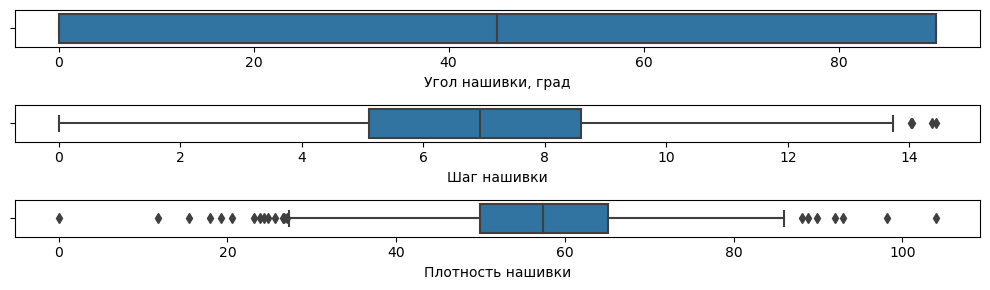

In [9]:
fig, axs = plt.subplots(3, figsize = (10,3))
plt1 = sns.boxplot(df2['Угол нашивки, град'], ax = axs[0])
plt2 = sns.boxplot(df2['Шаг нашивки'], ax = axs[1])
plt3 = sns.boxplot(df2['Плотность нашивки'], ax = axs[2])
plt.tight_layout()

In [10]:
df = pd.merge(df1, df2, how="inner")
df.drop(['Unnamed: 0','Температура вспышки, С_2', 'модуль упругости, ГПа', 'Содержание эпоксидных групп,%_2', 'Угол нашивки, град', 'Поверхностная плотность, г/м2'], axis=1, inplace=True)
df.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Количество отвердителя, м.%","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,30.0,70.0,3000.0,220.0,4.0,57.0
1,1.857143,2030.0,50.0,70.0,3000.0,220.0,4.0,60.0
2,1.857143,2030.0,49.9,70.0,3000.0,220.0,4.0,70.0


<AxesSubplot:>

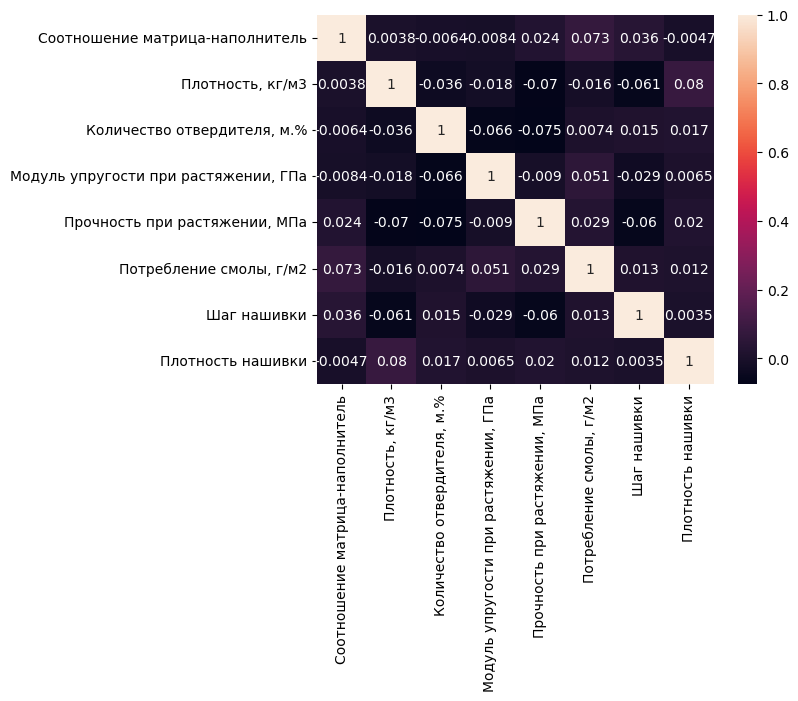

In [11]:
sns.heatmap(df.corr(), annot=True)

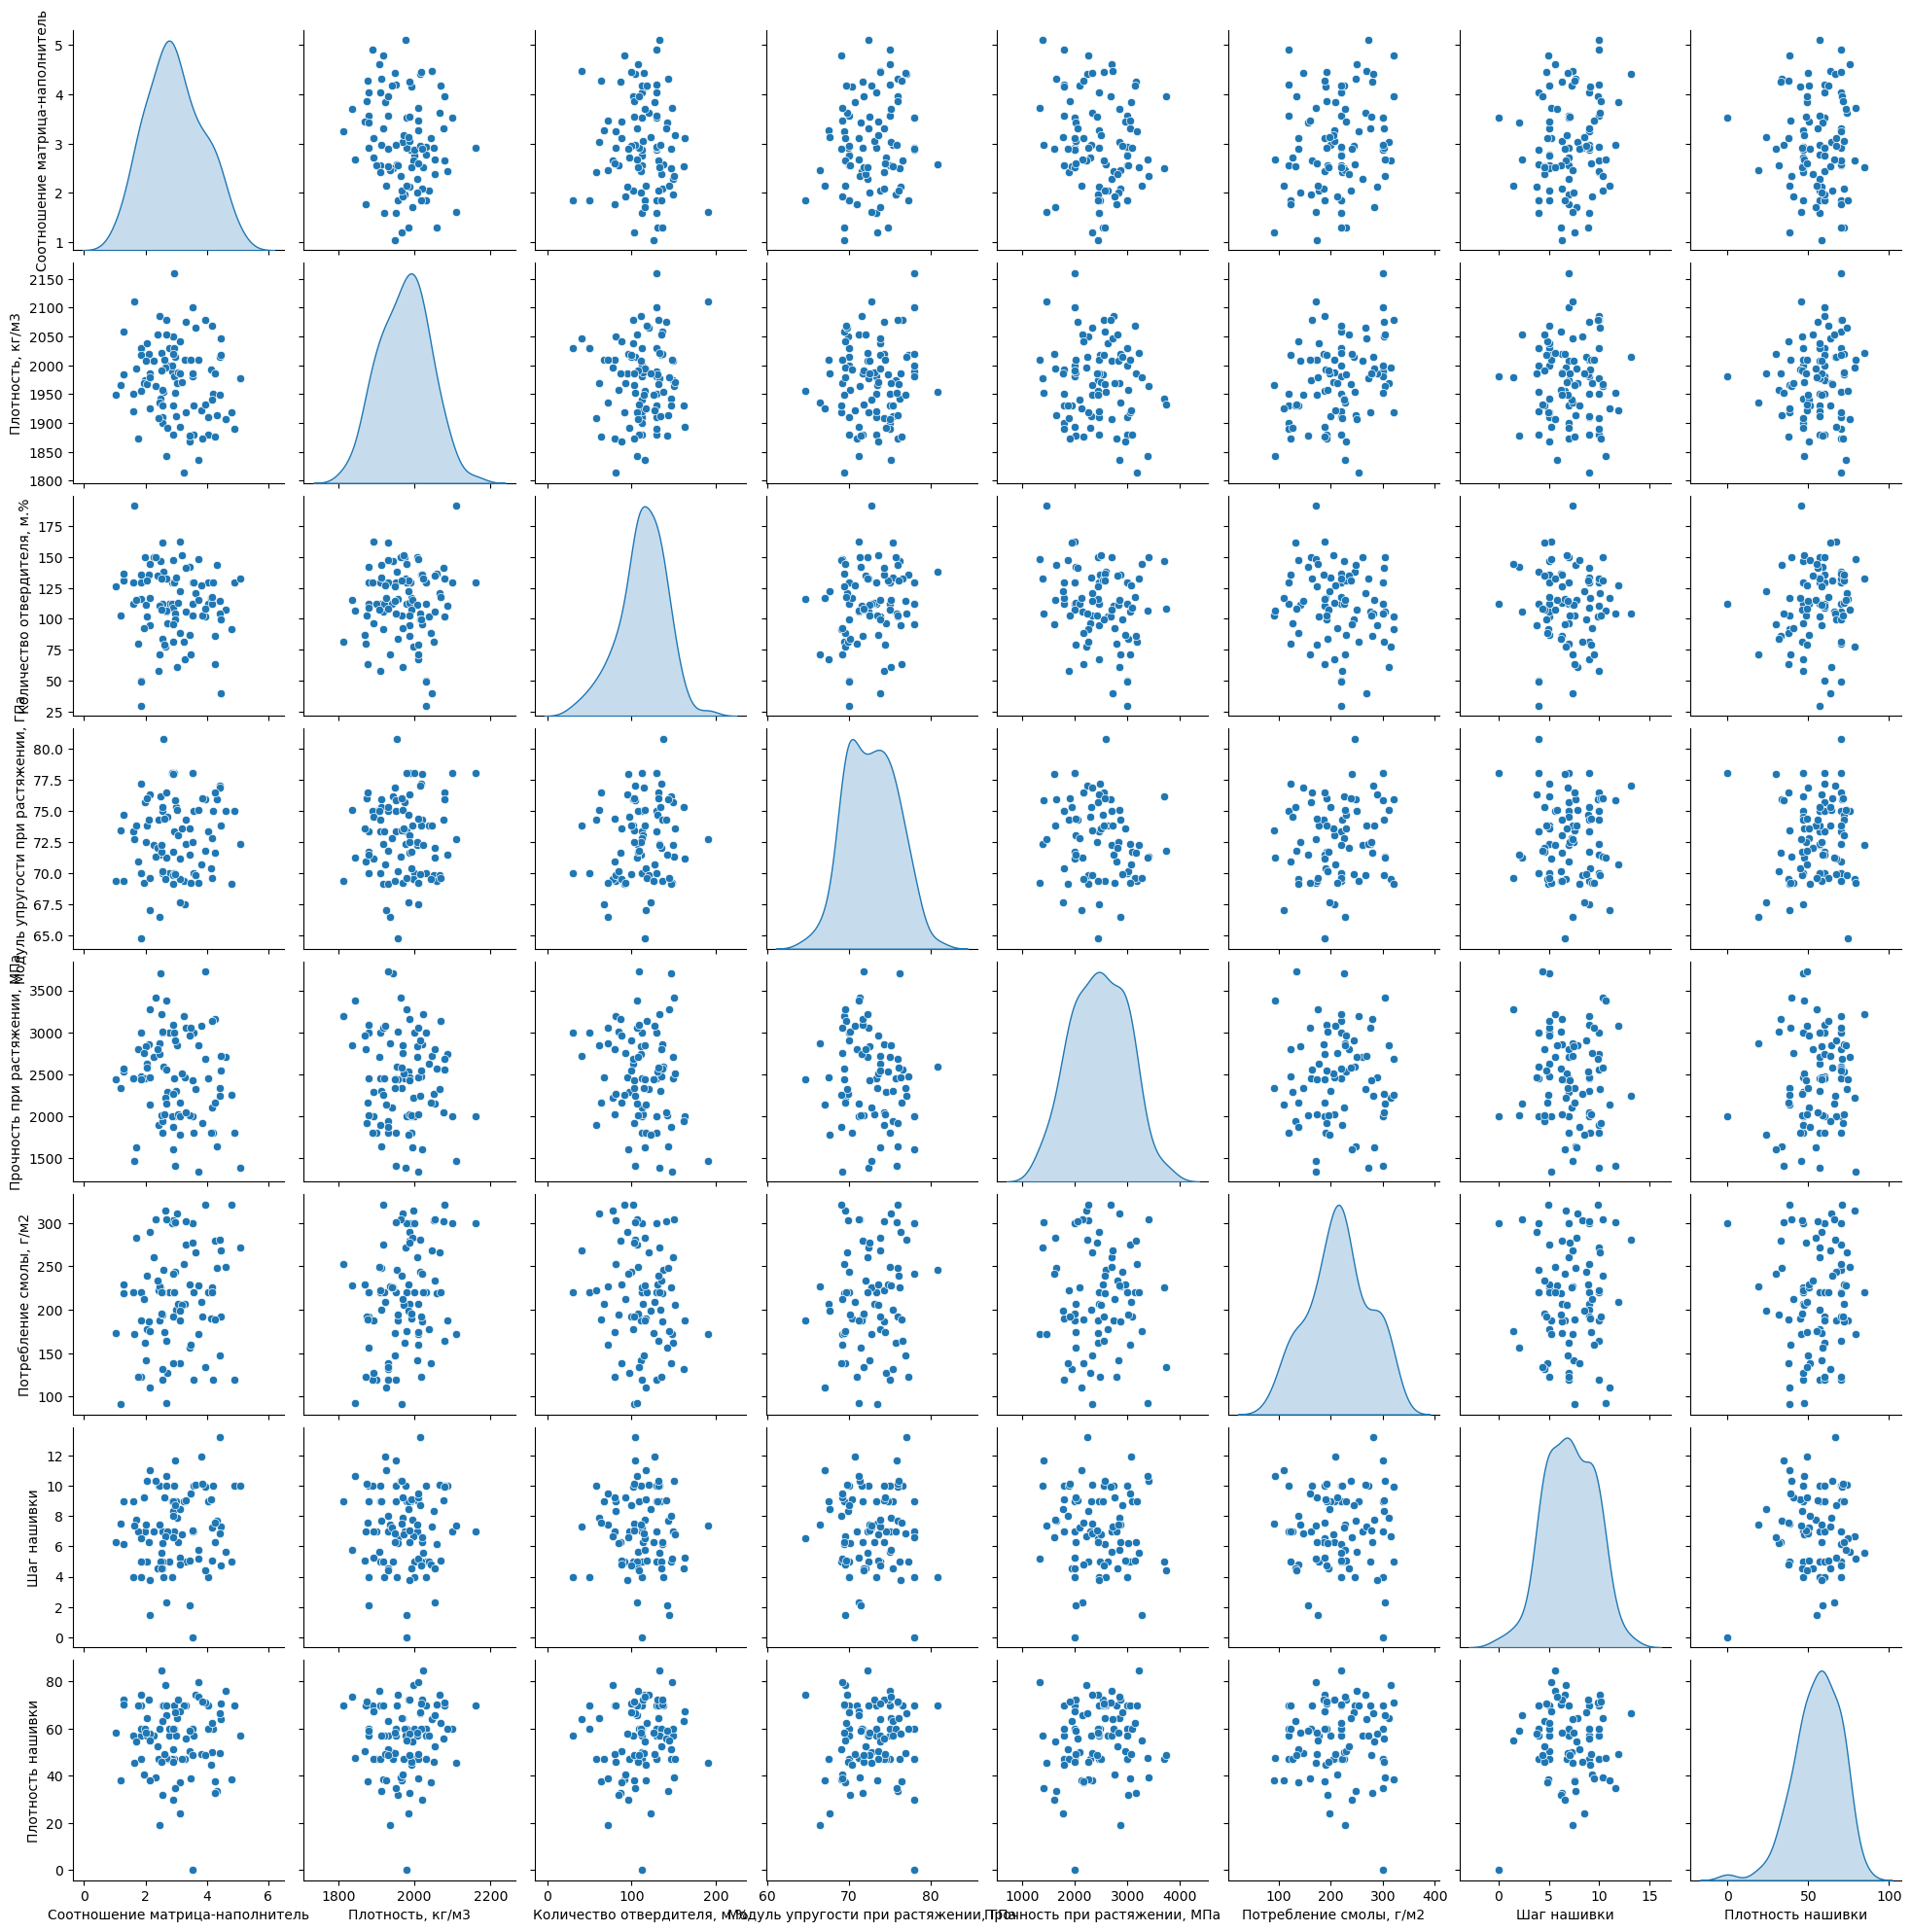

In [12]:
sns.pairplot(df.head(100), diag_kind='kde', palette='cbar')

In [13]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
Количество отвердителя, м.%             0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   Количество отвердителя, м.%           1023 non-null   float64
 3   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 4   Прочность при растяжении, МПа         1023 non-null   float64
 5   Потребление смолы, г/м2               1023 non-null   float64
 6   Шаг нашивки                           1023 non-null   float64
 7   Плотность нашивки                     1023 non-null   float64
dtypes: float64(8)
memory usage: 71.9 KB


In [15]:
X = df.copy()
X

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Количество отвердителя, м.%","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,30.000000,70.000000,3000.000000,220.000000,4.000000,57.000000
1,1.857143,2030.000000,50.000000,70.000000,3000.000000,220.000000,4.000000,60.000000
2,1.857143,2030.000000,49.900000,70.000000,3000.000000,220.000000,4.000000,70.000000
3,1.857143,2030.000000,129.000000,70.000000,3000.000000,220.000000,5.000000,47.000000
4,2.771331,2030.000000,111.860000,70.000000,3000.000000,220.000000,5.000000,57.000000
...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,86.992183,73.090961,2387.292495,125.007669,9.076380,47.019770
1019,3.444022,2050.089171,145.981978,72.920827,2360.392784,117.730099,10.565614,53.750790
1020,3.280604,1972.372865,110.533477,74.734344,2662.906040,236.606764,4.161154,67.629684
1021,3.705351,2066.799773,141.397963,74.042708,2071.715856,197.126067,6.313201,58.261074


In [16]:
from sklearn.decomposition import PCA
features = [
    'Плотность, кг/м3',
    'Количество отвердителя, м.%',
    'Модуль упругости при растяжении, ГПа',
    "Прочность при растяжении, МПа",
    'Потребление смолы, г/м2',
    'Шаг нашивки',
    'Плотность нашивки'
]

X = df.copy()
y = X.pop("Соотношение матрица-наполнитель")
X = X.loc[:, features]

# Стандартизация
X_stand = (X - X.mean(axis=0)) / X.std(axis=0)

pca = PCA()
X_pca = pca.fit_transform(X_stand)

# Переводим результат в Pandas Dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

# В loading записываем "смысловую нагрузку" компонентa, их корреляцию с исходными
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=X.columns,
)

print(loadings)

                                           PC1       PC2       PC3       PC4  \
Плотность, кг/м3                     -0.042899  0.755178  0.039010  0.123216   
Количество отвердителя, м.%          -0.561243 -0.087856  0.117241 -0.343571   
Модуль упругости при растяжении, ГПа  0.433295 -0.008695  0.503498  0.436031   
Прочность при растяжении, МПа         0.549665 -0.199338 -0.318839 -0.531938   
Потребление смолы, г/м2               0.229482 -0.163900  0.650802 -0.303280   
Шаг нашивки                          -0.374693 -0.337729  0.345030  0.016312   
Плотность нашивки                     0.015253  0.491175  0.294916 -0.549046   

                                           PC5       PC6       PC7  
Плотность, кг/м3                     -0.025226  0.389497  0.508742  
Количество отвердителя, м.%           0.553458 -0.281266  0.400093  
Модуль упругости при растяжении, ГПа  0.123098 -0.511491  0.302936  
Прочность при растяжении, МПа        -0.117636 -0.025167  0.508965  
Потребление см

[None, None]

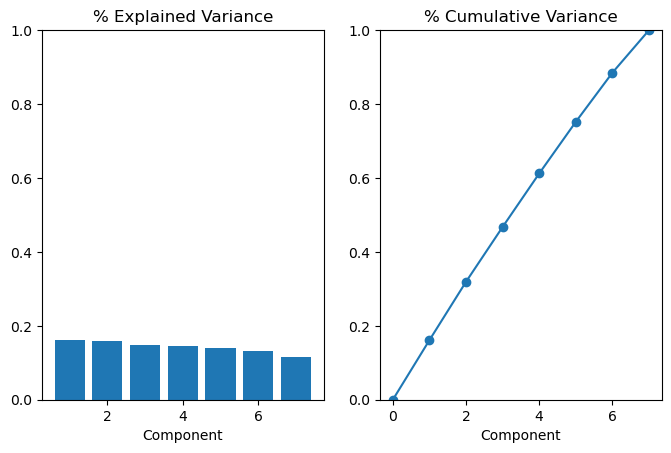

In [17]:
fig, axs = plt.subplots(1, 2)
n = pca.n_components_
grid = np.arange(1, n + 1)

evr = pca.explained_variance_ratio_
axs[0].bar(grid, evr)
axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))

cv = np.cumsum(evr)
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))

fig.set(figwidth=8, dpi=100)

<AxesSubplot:ylabel='Count'>

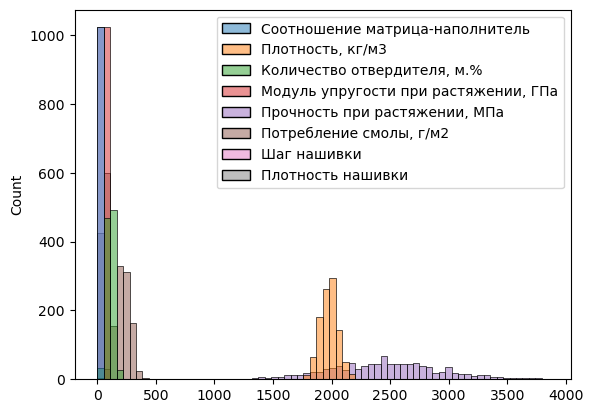

In [18]:
sns.histplot(df)

<AxesSubplot:ylabel='Count'>

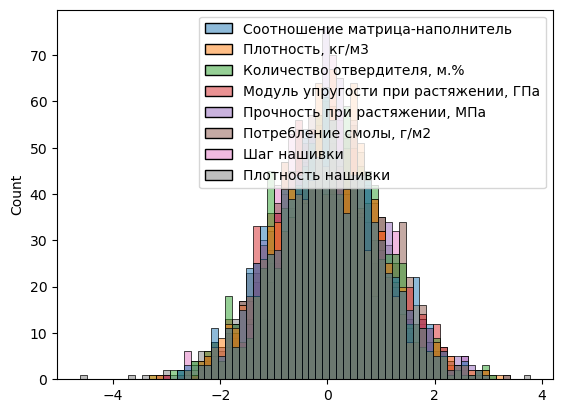

In [19]:
X = df.copy()
X_stand = (X - X.mean(axis=0)) / X.std(axis=0)
sns.histplot(X_stand)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, train_size=0.7, test_size=0.3, random_state=0)
X_train.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Количество отвердителя, м.%","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
1020,0.383520,-0.045600,-0.001318,0.450715,0.403567,0.304400,-1.068111,0.848173
603,0.789166,-1.040048,0.922817,-1.081665,0.513892,0.901193,-0.592924,0.512889
10,-0.011704,2.499214,0.651304,1.497741,-0.961483,1.365625,0.039313,1.040086
105,-0.269854,0.283974,-0.348788,-1.117778,-0.041913,-1.071107,0.374951,1.212480
68,-0.272032,-1.797826,-0.132421,-0.677637,1.874697,-2.108869,1.452589,-0.777604


In [21]:
y_train.head()

1020    3.280604
603     3.651050
10      2.919678
105     2.683929
68      2.681941
Name: Соотношение матрица-наполнитель, dtype: float64

In [22]:
X_stand.describe().transpose()[['mean', 'std']]

,mean,std
Соотношение матрица-наполнитель,-2.446615e-15,1.0
"Плотность, кг/м3",-2.237159e-15,1.0
"Количество отвердителя, м.%",-1.578948e-15,1.0
"Модуль упругости при растяжении, ГПа",-1.836176e-14,1.0
"Прочность при растяжении, МПа",-1.741846e-16,1.0
"Потребление смолы, г/м2",3.050726e-15,1.0
Шаг нашивки,-2.736976e-15,1.0
Плотность нашивки,1.301446e-15,1.0


In [34]:
#пробую провести линейную регрессию

from sklearn.metrics import mean_squared_error 

features = [
    'Соотношение матрица-наполнитель',
    'Плотность, кг/м3',
    'Количество отвердителя, м.%',
    'Модуль упругости при растяжении, ГПа',
    'Потребление смолы, г/м2',
    'Шаг нашивки',
    'Плотность нашивки'
]

y = X_stand['Прочность при растяжении, МПа']
X = X_stand[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_data_rmse = mean_squared_error(y_test, y_pred, squared=False)
training_data_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"Control RMSE = {test_data_rmse:4f}")
print(f"Train RMSE = {training_data_rmse:4f}")

Control RMSE = 0.970296
Train RMSE = 1.000758


In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [37]:
cv_scores=cross_val_score(
        model,
        X_train, y_train,
        cv=5, scoring="neg_root_mean_squared_error"
    )
print("Results k-fold:")
print("\n".join(f"RSME={s:.4f}" for s in cv_scores))
print(f"Mean RMSE = {np.mean(-cv_scores):.4f}")


Results k-fold:
RSME=-1.0873
RSME=-1.0226
RSME=-0.9822
RSME=-0.9377
RSME=-1.0189
Mean RMSE = 1.0097


In [72]:
X = df.drop(['Прочность при растяжении, МПа'], axis=1)
X

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Количество отвердителя, м.%","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,30.000000,70.000000,220.000000,4.000000,57.000000
1,1.857143,2030.000000,50.000000,70.000000,220.000000,4.000000,60.000000
2,1.857143,2030.000000,49.900000,70.000000,220.000000,4.000000,70.000000
3,1.857143,2030.000000,129.000000,70.000000,220.000000,5.000000,47.000000
4,2.771331,2030.000000,111.860000,70.000000,220.000000,5.000000,57.000000
...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,86.992183,73.090961,125.007669,9.076380,47.019770
1019,3.444022,2050.089171,145.981978,72.920827,117.730099,10.565614,53.750790
1020,3.280604,1972.372865,110.533477,74.734344,236.606764,4.161154,67.629684
1021,3.705351,2066.799773,141.397963,74.042708,197.126067,6.313201,58.261074


In [45]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils